<a href="https://colab.research.google.com/github/Paranthaman27/Titanic_dataset_Training_Internship/blob/main/Titanic_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load dataset (example: Titanic dataset)
df = pd.read_csv("Titanic-Dataset.csv")

In [18]:
# Preview data
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [21]:
# Check missing values
print(df.isnull().sum())

# Check datatypes
print(df.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [22]:
# Fill numerical missing values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill categorical missing values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop rows/columns if too many nulls
df = df.drop(columns=['Cabin'])  # Example: drop 'Cabin'


In [23]:
# Label Encoding for binary categories
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding for multi-categories
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

# Alternatively: MinMaxScaler()
# scaler = MinMaxScaler()
# df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])


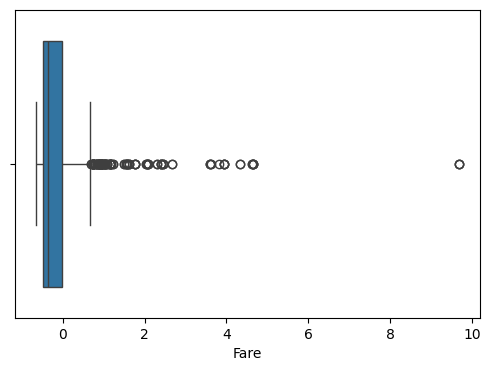

In [25]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.show()


In [26]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Keep only non-outliers
df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]
